<a href="https://colab.research.google.com/github/KevinMartinez1999/Machine_Learning/blob/develop/QAM_Modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QAM_Modulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
Ns = 100000
Mod = 16 #16QAM
Symbols_tx = np.random.randint(Mod, size = Ns)
df_sym_tx = pd.DataFrame(Symbols_tx)
df_sym_tx.head(10)

,0
0,8
1,14
2,2
3,15
4,1
5,10
6,8
7,3
8,6
9,9


In [3]:
mod_dict = {0:-3+3j, #0000
            1:-3+1j, #0001
            2:-3-3j, #0010
            3:-3-1j, #0011
            4:-1+3j, #0100
            5:-1+1j, #0101
            6:-1-3j, #0110
            7:-1-1j, #0111
            8:3+3j, #1000
            9:3+1j, #1001
            10:3-3j, #1010
            11:3-1j, #1011
            12:1+3j, #1100
            13:1+1j, #1101
            14:1-3j, #1110
            15:1-1j} #1111

In [4]:
#Modulación reemplazando símbolos por valores complejos (opción 1)
df_sym_mod = df_sym_tx.replace(mod_dict)
df_sym_mod.head(10)

,0
0,3.0+3.0j
1,1.0-3.0j
2,-3.0-3.0j
3,1.0-1.0j
4,-3.0+1.0j
5,3.0-3.0j
6,3.0+3.0j
7,-3.0-1.0j
8,-1.0-3.0j
9,3.0+1.0j


In [5]:
#Modulación reemplazando símbolos por valores complejos - mapeo (opción 2)
df_sym_mod2 = df_sym_tx.iloc[:,0].map(mod_dict)
df_sym_mod2.head(20)

0     3.0+3.0j
1     1.0-3.0j
2    -3.0-3.0j
3     1.0-1.0j
4    -3.0+1.0j
5     3.0-3.0j
6     3.0+3.0j
7    -3.0-1.0j
8    -1.0-3.0j
9     3.0+1.0j
10   -1.0+1.0j
11   -3.0+3.0j
12    1.0-3.0j
13    1.0-1.0j
14   -1.0+3.0j
15   -3.0+1.0j
16   -3.0-3.0j
17    3.0+1.0j
18   -1.0+1.0j
19    3.0-3.0j
Name: 0, dtype: complex128

In [6]:
def demapper_sym(symbols_I, symbols_Q, Ns, threshold = 2.0):
   symbol = []
   for i in range(Ns):
        if symbols_I[i] <= -threshold and symbols_Q[i] >= threshold: #-3+3j
            symbol.append(0)
        elif symbols_I[i] <= -threshold and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #-3+1j
            symbol.append(1)
        elif symbols_I[i] <= -threshold and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #-3-j
            symbol.append(3)
        elif symbols_I[i] <= -threshold and symbols_Q[i] <= -threshold: #-3-3j
            symbol.append(2)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] >= threshold: #-1+3j
            symbol.append(4)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #-1+j
            symbol.append(5)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #-1-j
            symbol.append(7)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] <= -threshold: #-1-3j
            symbol.append(6)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] >= threshold: #1+3j
            symbol.append(12)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #1+j
            symbol.append(13)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #1-j
            symbol.append(15)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] <= -threshold: #1-3j
            symbol.append(14)
        elif symbols_I[i] >= threshold and symbols_Q[i] >= threshold: #3+3j
            symbol.append(8)
        elif symbols_I[i] >= threshold and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #3+1j
            symbol.append(9)
        elif symbols_I[i] >= threshold and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #3-1j
            symbol.append(11)
        elif symbols_I[i] >= threshold and symbols_Q[i] <= -threshold: #3-3j
            symbol.append(10)
   return(symbol)

In [7]:
sym_tx = demapper_sym(np.real(df_sym_mod2), np.imag(df_sym_mod2), len(df_sym_mod2), threshold = 2.0)
print(sym_tx[0:10])
print(Symbols_tx[0:10])

[8, 14, 2, 15, 1, 10, 8, 3, 6, 9]
[ 8 14  2 15  1 10  8  3  6  9]


In [8]:
Xr = np.real(df_sym_mod2)
Xi = np.imag(df_sym_mod2)

In [9]:
# Adición de ruido blanco Gaussiano (AWGN)
# Se le adiciona diferentes cantidades de ruido para ver los efectos de 
# este en la demodulación.

target_snr_db = [i for i in np.arange(0, 21, 4)]
Xr_avg_p = np.mean(Xr**2)
Xr_avg_db = 10 * np.log10(Xr_avg_p)
#print(Xr_avg_db)
noise_avg_db_r = Xr_avg_db - target_snr_db
noise_avg_p_r = 10 ** (noise_avg_db_r / 10)
mean_noise = 0
#noise_r = np.random.normal(mean_noise, np.sqrt(noise_avg_p_r), len(Xr))
noise_r= [np.random.normal(mean_noise, np.sqrt(i), len(Xr)) for i in noise_avg_p_r]
Xr_ch = Xr + noise_r

Xi_avg_p = np.mean(Xi**2)
Xi_avg_db = 10 * np.log10(Xi_avg_p)
noise_avg_db_i = Xr_avg_db - target_snr_db
noise_avg_p_i = 10 ** (noise_avg_db_i / 10)
#noise_i = np.random.normal(mean_noise, np.sqrt(noise_avg_p_i), len(Xi))
noise_i = [np.random.normal(mean_noise, np.sqrt(i), len(Xi)) for i in noise_avg_p_i]
Xi_ch = Xi + noise_i

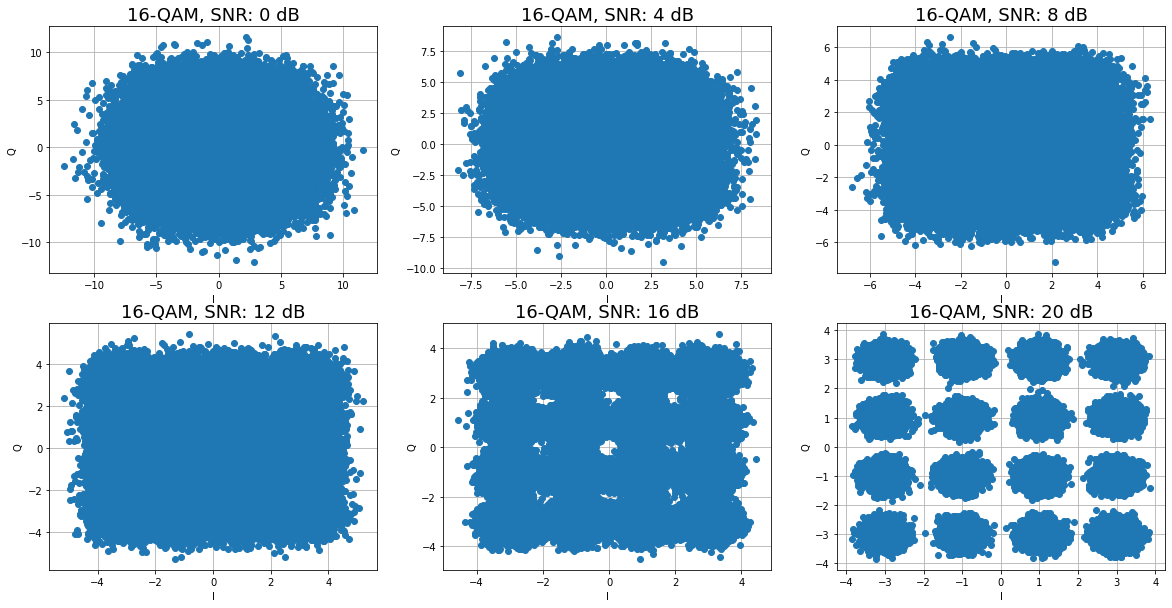

In [10]:
plt.figure(figsize=(20, 10))

for i in range(len(target_snr_db)):
  plt.subplot(2, 3, i+1)
  plt.title('16-QAM, SNR: '+str(target_snr_db[i])+' dB', fontsize = 18)
  plt.plot(Xi_ch[i], Xr_ch[i], 'o')
  plt.xlabel('I')
  plt.ylabel('Q')
  plt.grid()
plt.show()

In [11]:
#sym_rx = demapper_sym(Xr_ch[0], Xi_ch[0], len(Xr_ch[0]), threshold = 2.0)
sym_rx = [demapper_sym(Xr_ch[i], Xi_ch[i], len(Xr_ch[i]), threshold = 2.0) for i in range(len(target_snr_db))]
print(f'SNR {target_snr_db[0]}dB :', sym_rx[0][0:10])
print(f'SNR {target_snr_db[3]}dB:', sym_rx[3][0:10])
print('Original:', Symbols_tx[0:10])

SNR 0dB : [9, 11, 6, 7, 0, 10, 9, 2, 14, 13]
SNR 12dB: [8, 14, 2, 15, 1, 14, 8, 3, 2, 9]
Original: [ 8 14  2 15  1 10  8  3  6  9]


In [12]:
def SymbolErrorRate(sym_rx, sym_tx):
  error = 0
  for i, rx in enumerate(sym_rx):
    if rx != sym_tx[i]:
      error += 1
  SER = error / len(sym_tx)
  return SER, error

In [13]:
def BitErrorRate(sym_rx, sym_tx):
  sym_rx_bin = ''.join([f'{sym:04b}' for sym in sym_rx])
  sym_tx_bin = ''.join([f'{sym:04b}' for sym in sym_tx])

  error = 0
  for i in range(len(sym_tx_bin)):
    if sym_rx_bin[i] != sym_tx_bin[i]:
      error += 1
  BER = error / len(sym_tx_bin)
  return BER, error

In [14]:
arr_SER = []
for i in range(len(target_snr_db)):
  SER, error = SymbolErrorRate(sym_rx[i], Symbols_tx)
  arr_SER.append(SER)
  print(f'SER {target_snr_db[i]}dB:', SER)
  print(f'Error {target_snr_db[i]}dB:', error, '\n')

SER 0dB: 0.74252
Error 0dB: 74252 

SER 4dB: 0.59083
Error 4dB: 59083 

SER 8dB: 0.35295
Error 8dB: 35295 

SER 12dB: 0.11053
Error 12dB: 11053 

SER 16dB: 0.007
Error 16dB: 700 

SER 20dB: 1e-05
Error 20dB: 1 



In [15]:
arr_BER = []
for i in range(len(target_snr_db)):
  BER, error = BitErrorRate(sym_rx[i], Symbols_tx)
  arr_BER.append(BER)
  print(f'SER {target_snr_db[i]}dB:', BER)
  print(f'Error {target_snr_db[i]}dB:', error, '\n')

SER 0dB: 0.28781
Error 0dB: 115124 

SER 4dB: 0.187845
Error 4dB: 75138 

SER 8dB: 0.0981325
Error 8dB: 39253 

SER 12dB: 0.02851
Error 12dB: 11404 

SER 16dB: 0.00175
Error 16dB: 700 

SER 20dB: 2.5e-06
Error 20dB: 1 



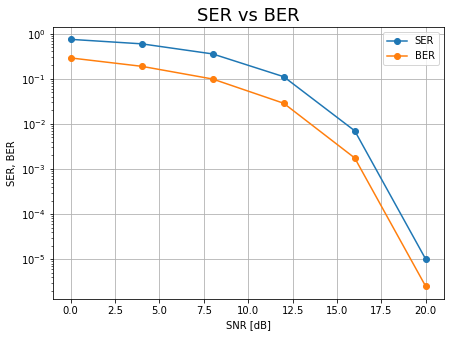

In [16]:
plt.figure(figsize=(7, 5))
plt.title('SER vs BER', fontsize = 18)
plt.plot(target_snr_db, arr_SER, marker = 'o', label = 'SER')
plt.plot(target_snr_db, arr_BER, marker = 'o', label = 'BER')
plt.xlabel('SNR [dB]')
plt.ylabel('SER, BER')
plt.yscale('log')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()